In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Cleanup HPI Data


In [15]:
# Load the Excel file
file_path = "data/HPI_not_seasonally_adjusted.xlsx"
sheet_name = "Montreal_CMA"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# Make all column names lowercase
df.columns = df.columns.str.lower()

# Convert the date column to datetime format if it's not already
df["date"] = pd.to_datetime(df["date"])

# Filter the date range
START_DATE = "2015-07-01"
END_DATE = "2024-07-31"
date_mask = (df["date"] >= START_DATE) & (df["date"] <= END_DATE)
filtered_df = df.loc[date_mask]

# Select the composite_HPI column
df_hpi = filtered_df[["date", "composite_hpi"]]

# Visualize the HPI Data

Make note of specific points of interest.


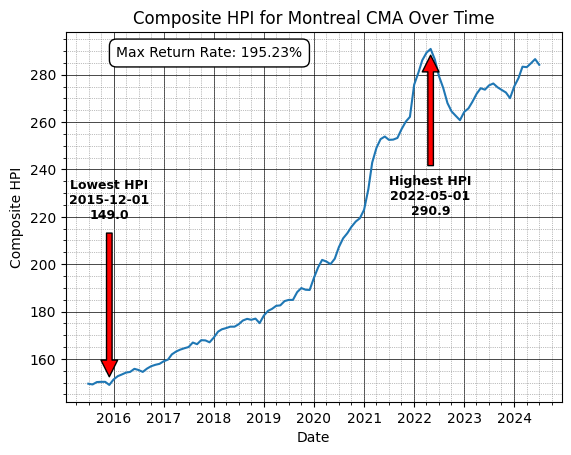

In [16]:
plt.plot(df_hpi["date"], df_hpi["composite_hpi"])
plt.title("Composite HPI for Montreal CMA Over Time")
plt.xlabel("Date")
plt.ylabel("Composite HPI")

# Add major grid lines
plt.grid(True, which="major", linestyle="-", linewidth="0.5", color="black")

# Add minor grid lines
plt.minorticks_on()
plt.grid(True, which="minor", linestyle=":", linewidth="0.5", color="gray")

# Find the date and value where composite_hpi is the highest
max_hpi_date = df_hpi.loc[df_hpi["composite_hpi"].idxmax(), "date"]
max_hpi_value = df_hpi["composite_hpi"].max()

# Annotate the highest HPI point
plt.annotate(
  f"Highest HPI\n{max_hpi_date.date()}\n{max_hpi_value}",
  xy=(max_hpi_date, max_hpi_value),
  xytext=(max_hpi_date, max_hpi_value - 70),
  arrowprops=dict(facecolor="red", shrink=0.05),
  fontsize=9,
  fontweight="bold",
  ha="center",
)

# Find the date and value where composite_hpi is the lowest
min_hpi_date = df_hpi.loc[df_hpi["composite_hpi"].idxmin(), "date"]
min_hpi_value = df_hpi["composite_hpi"].min()

# Annotate the lowest HPI point
plt.annotate(
  f"Lowest HPI\n{min_hpi_date.date()}\n{min_hpi_value}",
  xy=(min_hpi_date, min_hpi_value),
  xytext=(min_hpi_date, min_hpi_value + 70),
  arrowprops=dict(facecolor="red", shrink=0.05),
  fontsize=9,
  fontweight="bold",
  ha="center",
)

# Add annotation for the Return Rate
plt.annotate(
  f"Max Return Rate: {(max_hpi_value / min_hpi_value) * 100:,.2f}%",
  xy=(0.13, 1),
  xycoords="axes fraction",
  xytext=(-10, -10),
  textcoords="offset points",
  ha="left",
  va="top",
  bbox=dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white"),
)

plt.show()